In [18]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [20]:
data = np.load('reg_data_noise.npy')

In [21]:
xs = data[:,0]
ys = data[:,1]

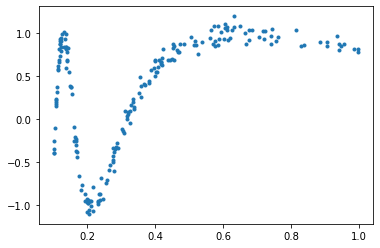

In [22]:
plt.plot(xs,ys,'.');

In [23]:
model = torch.nn.Sequential(torch.nn.Linear(1,1),
                    torch.nn.ReLU(), torch.nn.Linear(1,1))

In [24]:
t_xs = torch.from_numpy(xs).view(-1,1)
t_ys = torch.from_numpy(ys).view(-1,1)

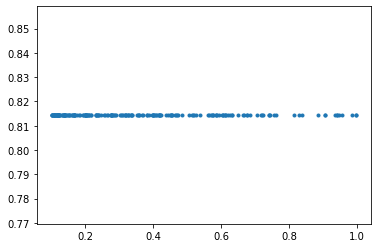

In [25]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

In [26]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(160,40))

In [27]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=len(train_set))

In [28]:
optimizer = torch.optim.SGD(model.parameters(),lr =0.001)

In [29]:
loss_func = torch.nn.MSELoss()

In [30]:
%%time
err_train=[]
err_valid=[]
for epoch in range(10000):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        vpred  = model(valid_set[:][0])
        vloss  = loss_func(vpred,valid_set[:][1])
        err_valid.append(vloss)
        pred  = model(train_set[:][0])
        loss  = loss_func(pred,train_set[:][1])
        err_train.append(loss)
    if epoch%1000 == 0:
        print("epoch %d %f %f " % (epoch, loss, vloss))   

epoch 0 0.685323 0.717177 
epoch 1000 0.459917 0.473623 
epoch 2000 0.455805 0.467060 
epoch 3000 0.455730 0.466654 
epoch 4000 0.455729 0.466608 
epoch 5000 0.455729 0.466602 
epoch 6000 0.455729 0.466601 
epoch 7000 0.455729 0.466601 
epoch 8000 0.455729 0.466601 
epoch 9000 0.455729 0.466601 
CPU times: user 12.6 s, sys: 142 ms, total: 12.7 s
Wall time: 12.8 s


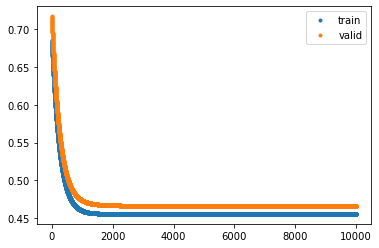

In [31]:
plt.plot(err_train, '.', label='train')
plt.plot(err_valid, '.', label='valid');
plt.legend()

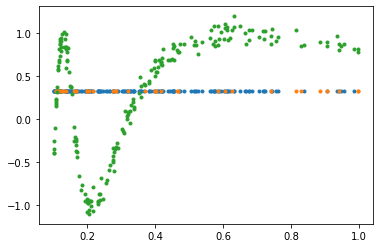

In [32]:
t_out_train = model(train_set[:][0])
plt.plot(train_set[:][0].data.numpy(), t_out_train.data.view(-1).numpy(),'.')
t_out_valid = model(valid_set[:][0])
plt.plot(valid_set[:][0].data.numpy(), t_out_valid.data.view(-1).numpy(),'.')
plt.plot(xs,ys,'.');

In [33]:
torch.save(model, "model.pt")